# Discrimination Analysis
### State of California Department of Developmental Services (DDS) dataset

#### Assignment Prompt:
For this assignment, your task is to analyze a set of data and make a judgment about whether it indicates the presence of bias in the system in question. You may use whatever analytical tool(s) you like for this assignment, but you will need to submit both a process log as well as your final memo, which should itself include a clear overview of your analysis and supporting evidence for your argument.

When crafting your memo, keep in mind the discussions we've had in class about the level of detail in recent stories we've read. Your process log should include every step you took (such that another person could replicate your analysis, assuming they had access to the same tools). Your memo, meanwhile, should articulate enough of your process (and include enough of your evidence) to satisfy the reader. In other words, there will be more detail in your process log, but your memo still needs to be persuasive.

In this case, I will ask that you work alone on this assignment; please do not discuss your analyses with your classmates. You will not be graded on the sophistication of the tool you use (a spreadsheet program is fine), only on the clarity of your process log, the accuracy of whatever calculations you use, and the persuasiveness of your evidence.

## Part I: Exploring the data

### Read in the DDS dataset

In [1]:
import pandas as pd

# These are all for matplotlib/ graphs
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline


# This reads the DDS csv into a very originally-named dataframe called 'df'
df = pd.read_csv('dds_data.csv')

# This will show the first ten results, to get a sense of what the data looks like
df.head(10)

,ID,Age_Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13-17,17,Female,2113,White not Hispanic
1,10409,22-50,37,Male,41924,White not Hispanic
2,10486,0 - 5,3,Male,1454,Hispanic
3,10538,18-21,19,Female,6400,Hispanic
4,10568,13-17,13,Male,4412,White not Hispanic
5,10690,13-17,15,Female,4566,Hispanic
6,10711,13-17,13,Female,3915,White not Hispanic
7,10778,13-17,17,Male,3873,Black
8,10820,13-17,14,Female,5021,White not Hispanic
9,10823,13-17,13,Male,2887,Hispanic


### This dataset has 1,000 entries and six fields, one of which is a unique indentifying number

In [2]:
df.shape

(1000, 6)

### Check for duplicate entries

In [3]:
# This throws an error--the column name for 'ID' isn't being called correctly
# df[df['ID'].duplicated() == True]

### Check the column names for hidden characters/ spaces

In [4]:
# This shows a space after 'ID' in the first column name
# by running a loop and printing each column name
# Documentation here: https://docs.python.org/3/library/functions.html#repr
for n in df.columns:
    print(repr(n))

'ID '
'Age_Cohort'
'Age'
'Gender'
'Expenditures'
'Ethnicity'


### Rename the ID column to remove the space

In [5]:
# 'rename' does what it says
# Documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
# I'm specifying 'ID ' and that I want to replace it with 'ID'
# 'inplace=True' applies this change to all future cells
df.rename(index=str, columns={"ID ": "ID"}, inplace=True)

### Look for duplicate entries

In [6]:
# df.ID.duplicated specifies that we're looking in the ID column for duplicate entries
# Then wrapping the df back around that will print the full row of information for any duplicate entries.
# No duplicates here!
df[df.ID.duplicated() == True]

,ID,Age_Cohort,Age,Gender,Expenditures,Ethnicity


### Let's see how many people there are, by age range.

In [7]:
# Value counts will show each unique value and the number of times that value occurs
# These age groups have irregular intervals, so this is not very helpful
df.Age_Cohort.value_counts()

22-50     226
13-17     212
18-21     199
6-12      175
 51 +     106
 0 - 5     82
Name: Age_Cohort, dtype: int64

### People by age

In [8]:
# sort_values sorts ascending by default, but I'm interested in the mode of this data
# ascending=False will show the most common ages in the dataset
df.Age.value_counts().sort_values(ascending=False)

20    54
16    50
18    50
19    48
21    47
17    46
13    39
14    39
15    38
11    28
6     27
8     26
10    25
9     25
12    24
5     23
27    23
24    22
23    22
7     20
4     20
25    19
22    18
30    17
0     14
32    13
26    12
33    12
29    10
1     10
      ..
52     3
51     3
80     3
40     3
36     3
88     3
57     2
79     2
76     2
70     2
86     2
42     2
56     2
90     2
45     2
95     2
81     1
48     1
55     1
67     1
44     1
78     1
46     1
94     1
83     1
85     1
89     1
91     1
82     1
77     1
Name: Age, Length: 86, dtype: int64

### People by gender

In [9]:
df.Gender.value_counts()

Female    503
Male      497
Name: Gender, dtype: int64

### People by ethnicity

In [10]:
df.Ethnicity.value_counts()

White not Hispanic    401
Hispanic              376
Asian                 129
Black                  59
Multi Race             26
American Indian         4
Native Hawaiian         3
Other                   2
Name: Ethnicity, dtype: int64

## Part II: Discrimination in funding

In [11]:
# This section calls for a graph, so I'm importing some old styles I usually use
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': 'white',
    'font.size': 12.0,
    'axes.facecolor': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': 'white',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#33104A', '#4B186C', '#63218F', '#8F3192', '#C0458A', '#E8608A', '#EF9198', '#F8C1A8']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'legend.loc': 'upper right',
    'legend.fontsize': 'small'
})

### Graph the median amount of money recieved by each ethnicity

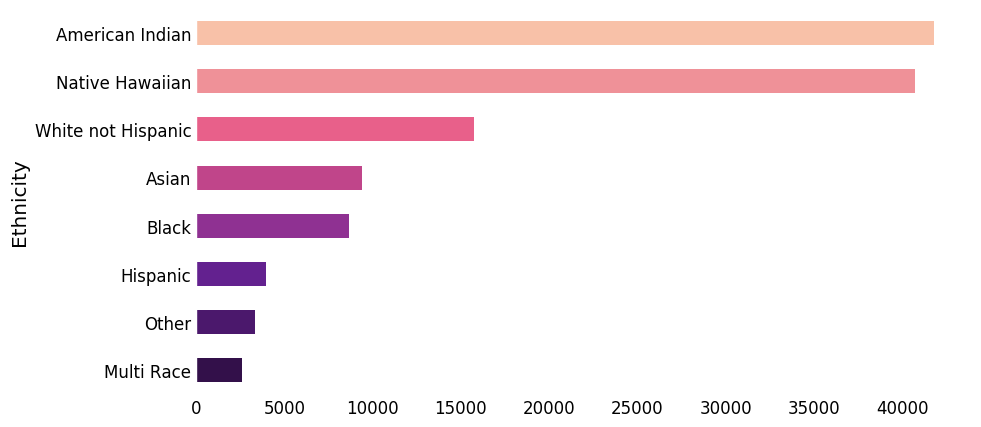

In [12]:
# Group the data by ethnicity, then find the median expenditures for each group
result = df.groupby("Ethnicity").Expenditures.median().sort_values()

# Plot the result as a bar graph
ax = result.plot(kind='barh', figsize=(10, 5))

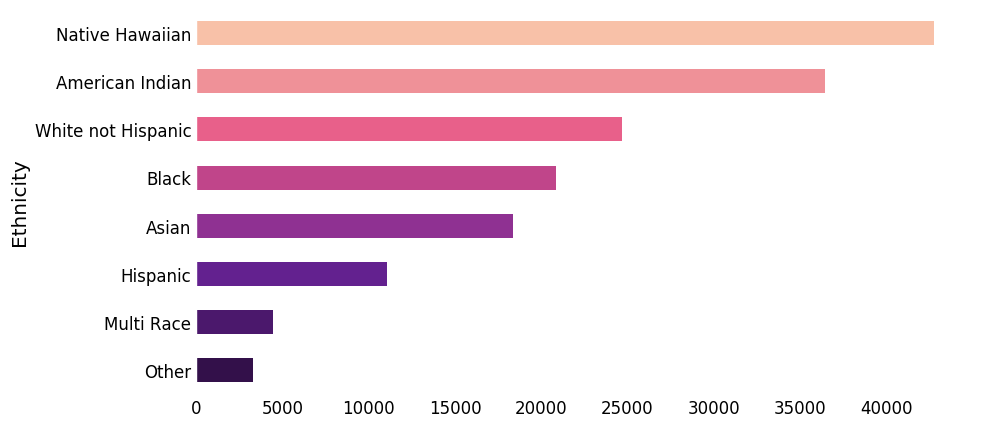

In [13]:
# Group the data by ethnicity, then find the mean expenditures for each group
result = df.groupby("Ethnicity").Expenditures.mean().sort_values()

ax = result.plot(kind='barh', figsize=(10, 5))

### Make separate data sets for each ethnicity

In [14]:
# This filters the ethnicity column by the specified ethnicity, 
# then appends the rest of the dataset/ row info around that column
nh = df[df.Ethnicity == 'Native Hawaiian']
ai = df[df.Ethnicity == 'American Indian']
wh = df[df.Ethnicity.str.contains('White')]
bl = df[df.Ethnicity == 'Black']
an = df[df.Ethnicity == 'Asian']
hs = df[df.Ethnicity == 'Hispanic']
mr = df[df.Ethnicity == 'Multi Race']
oth = df[df.Ethnicity == 'Other']

### Take a look at how many people are being funded in each ethnicity

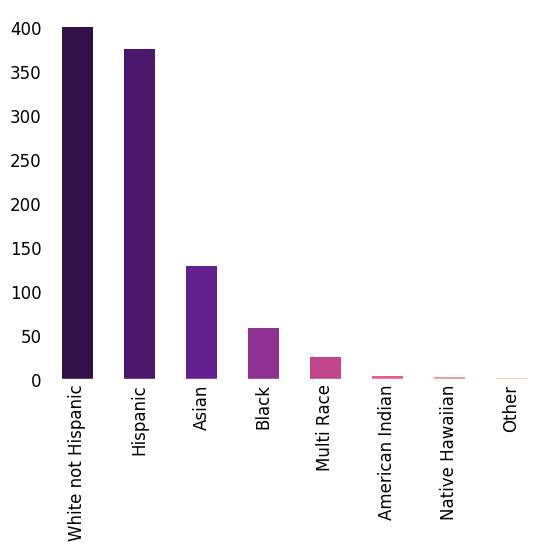

In [15]:
# According to the US Gov Census (https://www.census.gov/quickfacts/ca)
# CA is about 37% white, 39% Hispanic, 6.5% black, 15.2% Asian, 
# 4% Multi Race, 1.6% American Indian,  0.5% Native Hawaiian

# Assuming equal instances of disabilities throughout populations
# This graph is a bit over-funded toward White people
# And a bit under-funded toward Asian and Black pepole
pd.value_counts(df['Ethnicity']).plot.bar()

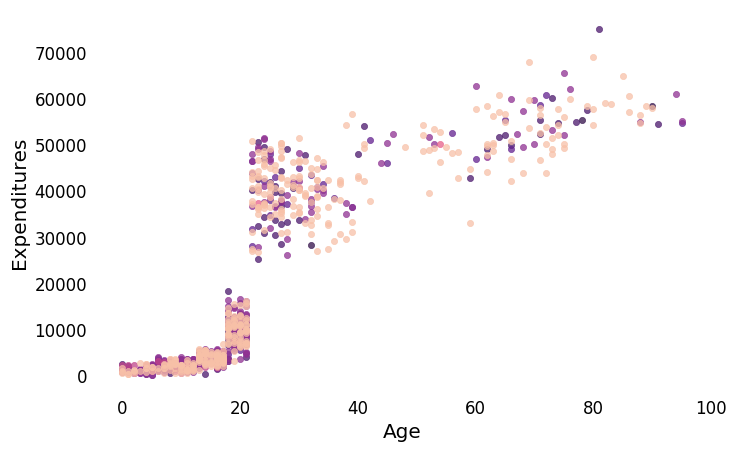

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = df.groupby('Ethnicity')
for name, group in groups:
    group.plot(kind='scatter', x='Age', y='Expenditures', color=colors.pop(), label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

In [17]:
# Set up dataframes filtered by gender
male = df[df.Gender=='Male']
female = df[df.Gender=='Female']

### People 22 years old or older
There's a break in the data at 22 years of age, which likely signifies some type of policy shift, so those two age brackets will be examined separately.

### Women 22+

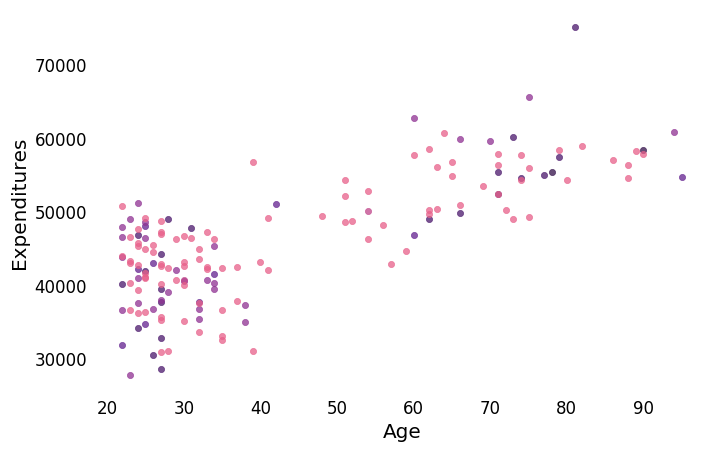

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = female[female.Age >= 22].groupby('Ethnicity')
for name, group in groups:
    group.plot(kind='scatter', x='Age', y='Expenditures', color=colors.pop(), label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

### Men 22+

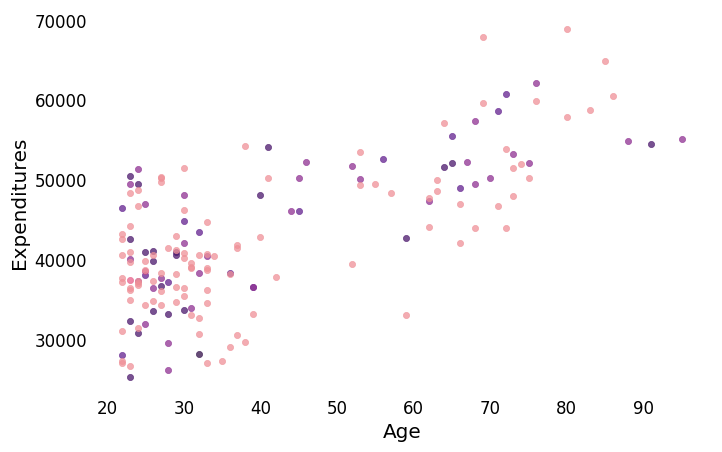

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = male[male.Age >= 22].groupby('Ethnicity')
for name, group in groups:
    group.plot(kind='scatter', x='Age', y='Expenditures', color=colors.pop(), label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

In [20]:
# Average amount of money paid to men 22 and older
male[male.Age >= 22].Expenditures.mean()

42947.0350877193

In [21]:
# Average amount of money paid to women 22 and older
female[female.Age >= 22].Expenditures.mean()

46066.31055900621

### Women 21 and under

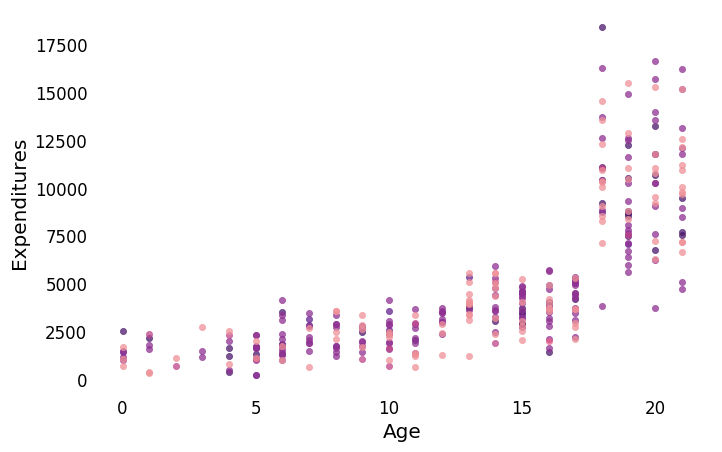

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = female[female.Age < 22].groupby('Ethnicity')
for name, group in groups:
    group.plot(kind='scatter', x='Age', y='Expenditures', color=colors.pop(), label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

### Men 21 and under

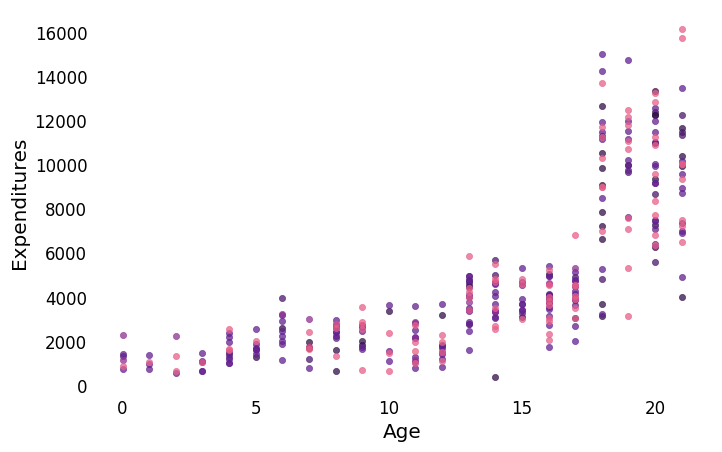

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

colors = list(reversed(plt.rcParams['axes.prop_cycle'].by_key()['color']))

groups = male[male.Age < 22].groupby('Ethnicity')
for name, group in groups:
    group.plot(kind='scatter', x='Age', y='Expenditures', color=colors.pop(), label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

In [24]:
# Average amount of money paid to men 21 and under
male[male.Age < 22].Expenditures.mean()

4916.10736196319

In [25]:
# Average amount of money paid to women 21 and under
female[female.Age < 22].Expenditures.mean()

4978.116959064328

### Native Hawaiian

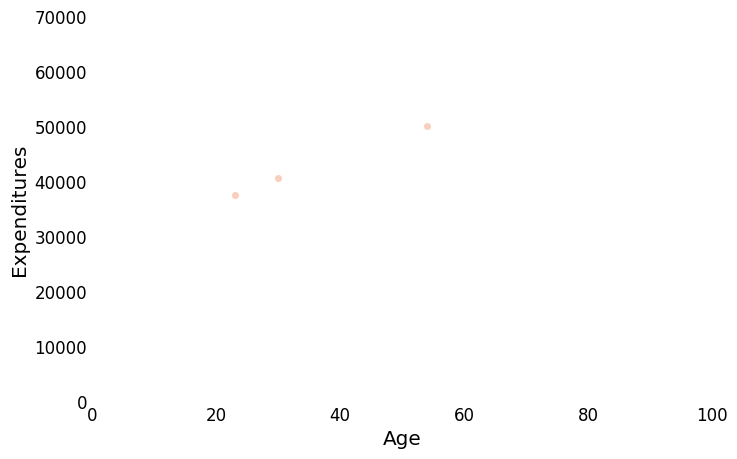

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))

# This sets the x and y-axis ranges, so the scale will stay the same on all the graphs
plt.xlim([0, 100])
plt.ylim([0, 70000])
nh.plot(kind='scatter', x='Age', y='Expenditures', color='#F8C1A8', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

### American Indian

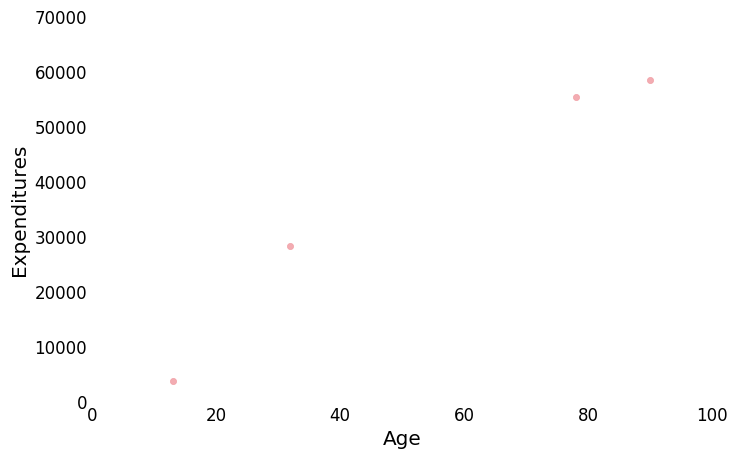

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.xlim([0, 100])
plt.ylim([0, 70000])

ai.plot(kind='scatter', x='Age', y='Expenditures', color='#EF9198', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

### White

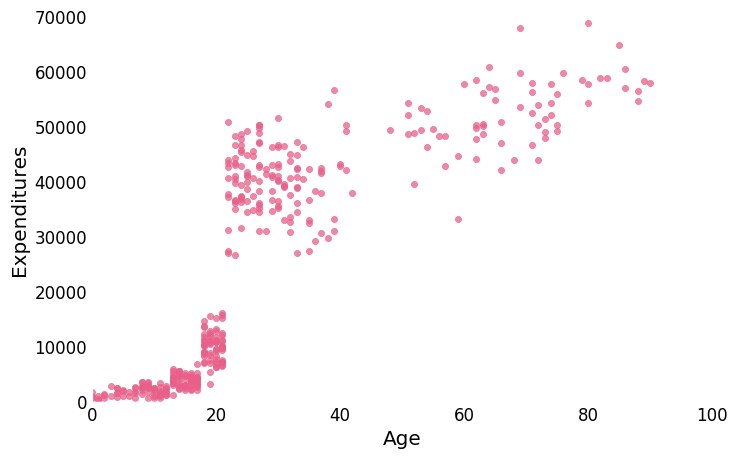

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.xlim([0, 100])
plt.ylim([0, 70000])

wh.plot(kind='scatter', x='Age', y='Expenditures', color='#E8608A', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

### Black

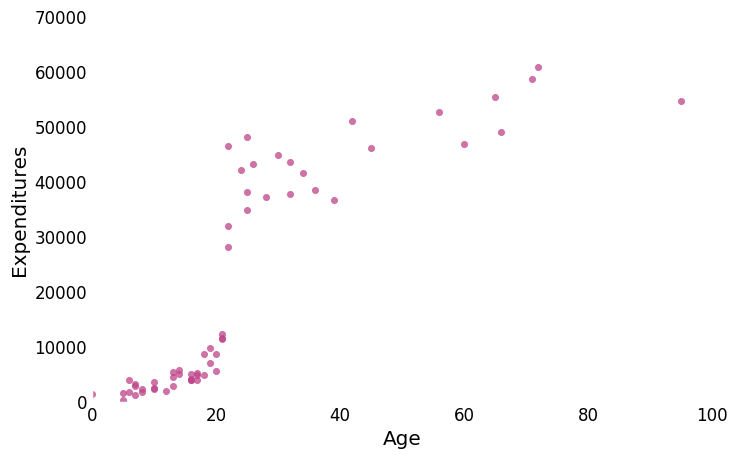

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.xlim([0, 100])
plt.ylim([0, 70000])

bl.plot(kind='scatter', x='Age', y='Expenditures', color='#C0458A', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

### Asian

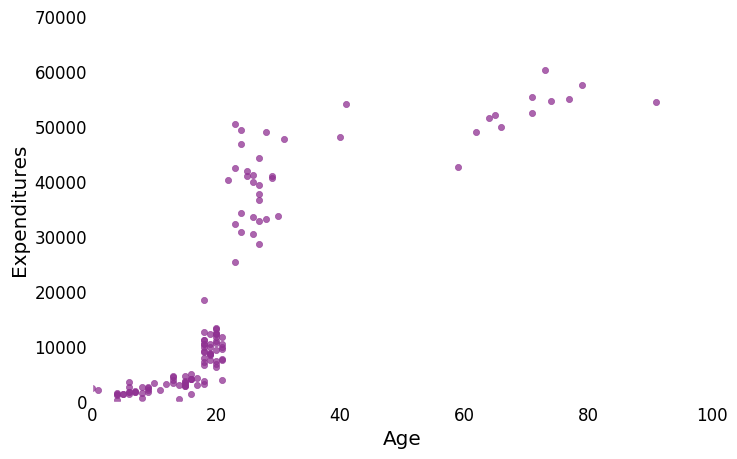

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.xlim([0, 100])
plt.ylim([0, 70000])

an.plot(kind='scatter', x='Age', y='Expenditures', color='#8F3192', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

### Hispanic

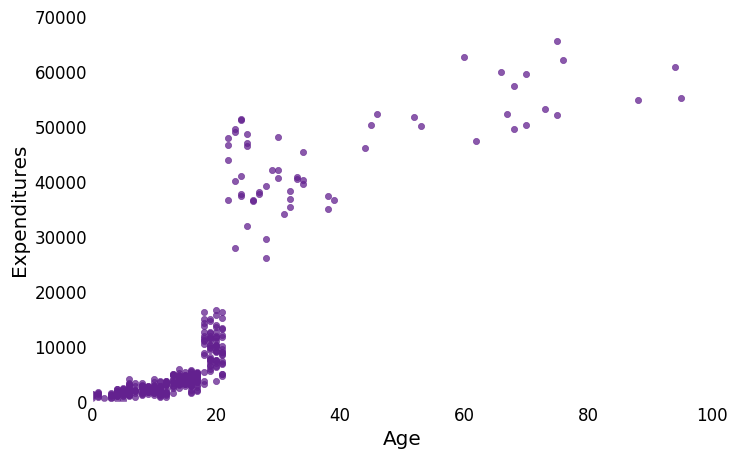

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.xlim([0, 100])
plt.ylim([0, 70000])

hs.plot(kind='scatter', x='Age', y='Expenditures', color='#63218F', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

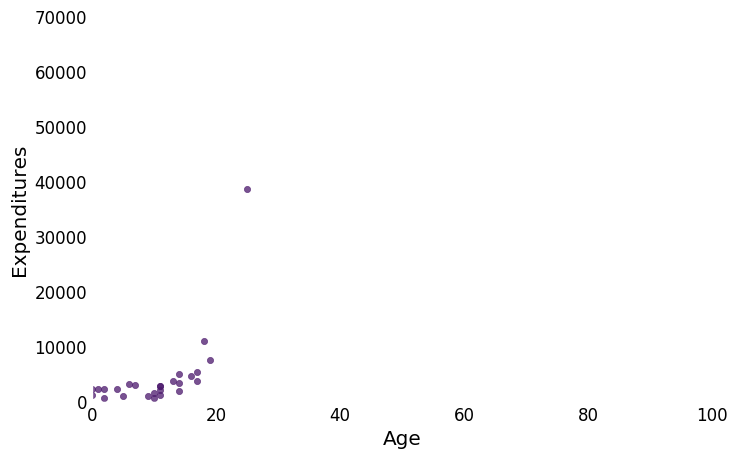

In [32]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.xlim([0, 100])
plt.ylim([0, 70000])

mr.plot(kind='scatter', x='Age', y='Expenditures', color='#4B186C', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

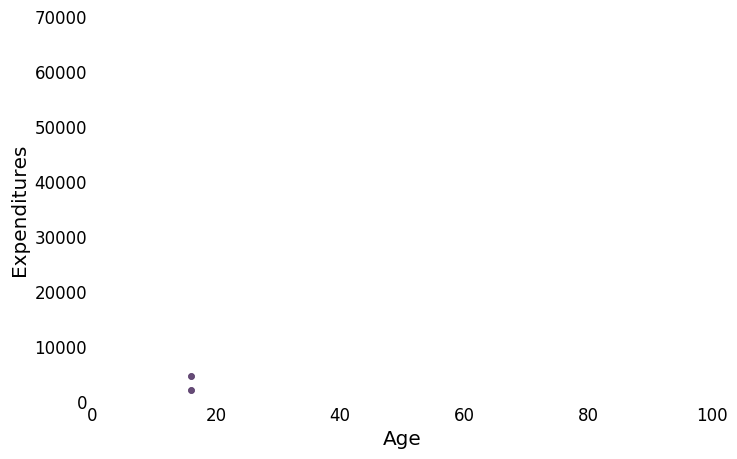

In [33]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.xlim([0, 100])
plt.ylim([0, 70000])

oth.plot(kind='scatter', x='Age', y='Expenditures', color='#33104A', label=name, s=20, ax=ax, alpha=0.75)
ax.legend_.remove()

## Print out the smaller datasets and take a look

In [34]:
# Multi Race
mr

,ID,Age_Cohort,Age,Gender,Expenditures,Ethnicity
13,11189,13-17,17,Male,5340,Multi Race
30,12850,13-17,13,Male,3775,Multi Race
84,18383,0 - 5,0,Male,1149,Multi Race
145,22988,13-17,16,Male,4664,Multi Race
191,26437,0 - 5,0,Male,2296,Multi Race
243,31168,6-12,11,Female,2918,Multi Race
288,35360,6-12,10,Female,1622,Multi Race
330,39942,13-17,14,Male,3399,Multi Race
362,43291,6-12,11,Male,2140,Multi Race
393,45755,6-12,11,Male,1144,Multi Race


In [35]:
# Other
oth

,ID,Age_Cohort,Age,Gender,Expenditures,Ethnicity
475,53008,13-17,16,Female,2018,Other
708,72729,13-17,16,Male,4615,Other


In [36]:
# American Indians
ai

,ID,Age_Cohort,Age,Gender,Expenditures,Ethnicity
231,30234,51 +,78,Female,55430,American Indian
575,61498,13-17,13,Female,3726,American Indian
730,74721,51 +,90,Female,58392,American Indian
788,79645,22-50,32,Male,28205,American Indian


In [37]:
# The 78 yo female recieves exactly the same amount of funding as everyone else for her age, 
# Since she's the only 78 year-old. Let's make an age range.
# This filters for all individuals between 70 and 79 years old
df[(df['Age'] >= 70) & (df['Age'] <= 79)].Expenditures.mean()

54567.545454545456

In [38]:
# Let's dig into the Native Hawaiian dataset more to see if there's discrimination based on ethnicity
nh

,ID,Age_Cohort,Age,Gender,Expenditures,Ethnicity
615,65255,51 +,54,Female,50141,Native Hawaiian
675,70035,22-50,30,Female,40727,Native Hawaiian
778,78254,22-50,23,Male,37479,Native Hawaiian


In [39]:
# The 30 yo female recieves slightly less funding than average for her age
df[df.Age==30].Expenditures.mean()

41699.58823529412

In [40]:
# The 23 yo Male recieves about $2200 less funding than average for his age
df[df.Age==23].Expenditures.mean()

39657.90909090909

In [41]:
# The 54 yo female recieves about $400 more funding than average for her age
df[df.Age==54].Expenditures.mean()

49762.0

### Average expenditures, by age

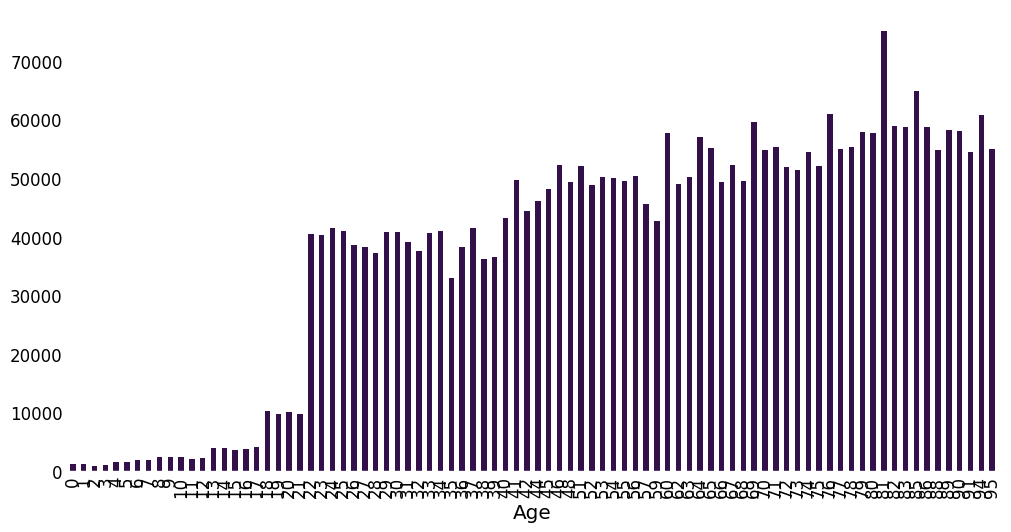

In [42]:
# This will group each individual by their age, then average the expenditures for each age,
# then plot it as a standard bar chart
df.groupby('Age').Expenditures.median().plot(kind='bar', color='#33104A', figsize=(12,6))

### Number of individuals recieving funding, by age

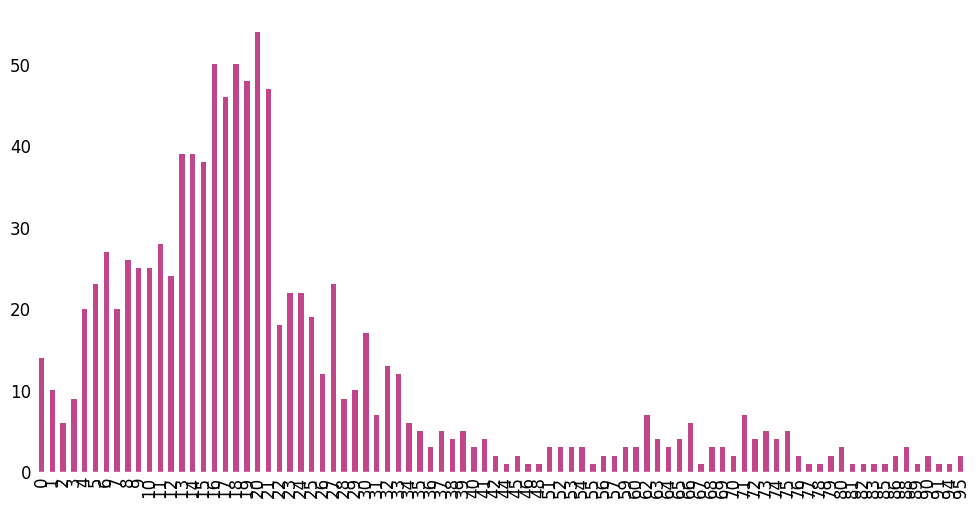

In [43]:
# This graph is misleading, as it does not display ages where there are zero individuals recieving funding
# For instance, there are no 58 year-olds.

# Set 'counts' as the number of instances of each age in the data set
count = df.Age.value_counts(sort=False)
# Changing to one uniform color, since color doesn't signify anything in this chart
count.plot(kind='bar', color='#C0458A', figsize=(12,6))


plt.show()

In [44]:
df.Age.mean()

22.8

In [45]:
# This will be a more accurate measure, since the chart is skewed right
df.Age.median()

18.0